<a href="https://colab.research.google.com/github/ozturksefa/text-detection-ocr/blob/main/Image_Augmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive/


In [ ]:
import os
os.chdir("/content/drive/My Drive/Colab Notebooks/Data")

In [ ]:
!pip install albumentations

     |████████████████████████████████| 634kB 2.7MB/s 
  Created wheel for imgaug: filename=imgaug-0.2.6-cp36-none-any.whl size=654020 sha256=8bc5386e12fdb40bcdf970d0ad9ca57671b2062b55b2b73e1404ea7b1383f17b
  Stored in directory: /root/.cache/pip/wheels/97/ec/48/0d25896c417b715af6236dbcef8f0bed136a1a5e52972fc6d0
Successfully built imgaug
  Found existing installation: imgaug 0.2.9
    Uninstalling imgaug-0.2.9:
      Successfully uninstalled imgaug-0.2.9


In [ ]:
!ls -l

total 8465
-rw------- 1 root root       1 Jul 27 21:40 annotations.csv
drwx------ 2 root root    4096 Jul 29 13:08 Augmented_data
drwx------ 2 root root    4096 Jul 24 08:27 drive
-rw------- 1 root root  196624 Jul 24 20:06 fis10.jpg
-rw------- 1 root root  286831 Jul 24 20:08 fis11.jpg
-rw------- 1 root root  294081 Jul 24 20:08 fis12.jpg
-rw------- 1 root root  277834 Jul 24 20:10 fis13.jpg
-rw------- 1 root root  405297 Jul 24 20:10 fis14.jpg
-rw------- 1 root root  177666 Jul 24 20:14 fis15.jpg
-rw------- 1 root root  250870 Jul 27 21:37 fis16.jpg
-rw------- 1 root root 1390106 Jul 24 20:18 fis17.jpeg
-rw------- 1 root root   10122 Jul 24 20:23 fis18.jpg
-rw------- 1 root root  350959 Jul 24 20:26 fis19.jpg
-rw------- 1 root root  259947 Jul 24 19:53 fis1.jpg
-rw------- 1 root root  131164 Jul 24 20:28 fis20.jpg
-rw------- 1 root root  377620 Jul 24 19:55 fis2.jpg
-rw------- 1 root root  373213 Jul 27 21:13 fis3.jpg
-rw------- 1 root root  254062 Jul 24 19:56 fis4.jpg
-rw------- 1 

In [ ]:
import random
import cv2
import matplotlib.pyplot as plt
import albumentations as A

In [ ]:
def visualize(image):
  plt.figure(figsize=(10,10))
  plt.axis('off')
  plt.imshow(image)

In [ ]:
doc_aug = A.Compose([
  A.Rotate(limit=30, p=0.5),
  A.GaussNoise(p=0.25),
  A.MotionBlur(p=.2),
  A.MedianBlur(blur_limit=3, p=0.1),
  A.Blur(blur_limit=3, p=0.2),
  A.OpticalDistortion(p=0.3),
  A.GridDistortion(p=.1),
  A.CLAHE(clip_limit=2),
  A.RandomBrightnessContrast(p=0.2),
  A.RGBShift(),
  A.HueSaturationValue(p=0.3),
  A.RandomGamma(gamma_limit=(20, 300), p=0.5)])
random.seed(42)

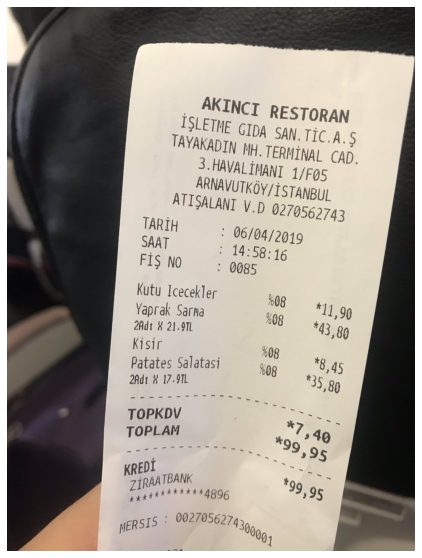

In [ ]:
image = cv2.imread('fis23.jpg')
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
visualize(image)



In [ ]:
DATASET_PATH = '/content/drive/My Drive/Colab Notebooks/Data'
IMAGES_PATH = f'{DATASET_PATH}/Augmented_data'
os.makedirs(DATASET_PATH, exist_ok=True)
os.makedirs(IMAGES_PATH, exist_ok=True)

In [ ]:
from tqdm import tqdm
import pandas as pd
rows = []

for i in tqdm(range(45,50)):
  augmented = doc_aug(image=image)
  file_name = f'form_aug_{i}.jpg'
  cv2.imwrite(f'{IMAGES_PATH}/{file_name}',augmented['image'])

100%|██████████| 5/5 [00:00<00:00,  5.62it/s]
